In [5]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv(r"C:\Users\User\Downloads\co2 - co2.csv")
df.rename(columns={'Make':'Brand'}, inplace = True)
df

,Brand,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Brand                             7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [11]:
print(df.isnull().sum())

Brand                               0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


In [15]:
# df.head(10)
df.tail()

,Brand,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


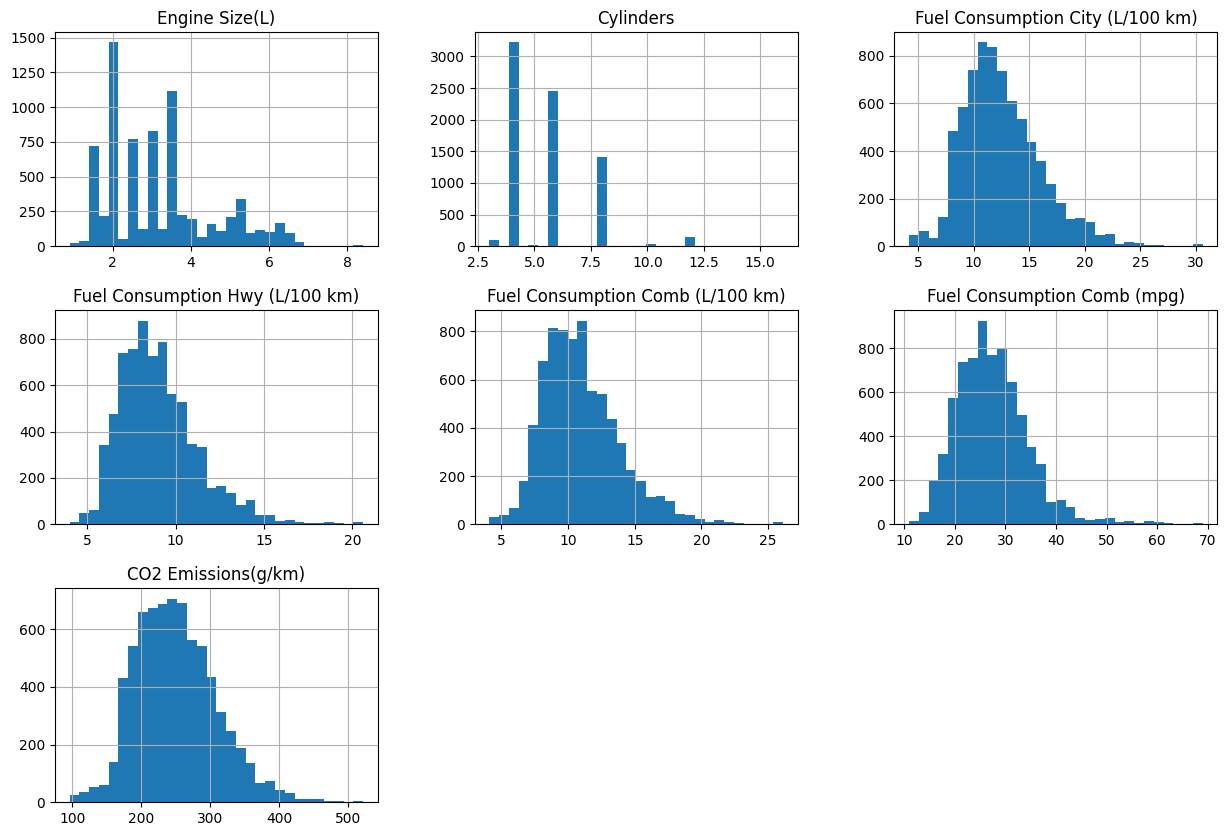

In [16]:
df.hist(bins=30,figsize=(15,10))    #bins = qty of histogram bar
plt.show()

Text(0.5, 1.0, 'Distribution of Cylinders')

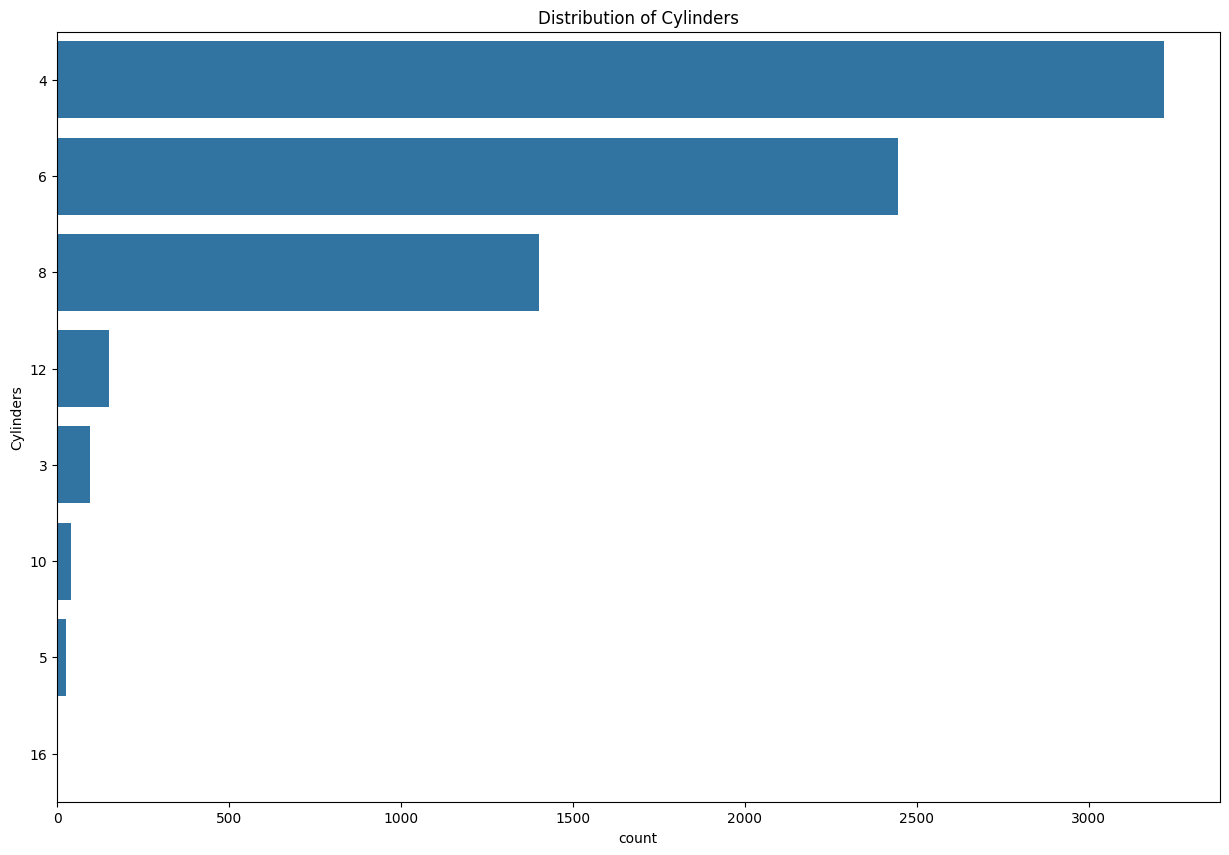

In [17]:
plt.figure(figsize=(15,10))
sns.countplot(y='Cylinders',data = df, order = df['Cylinders'].value_counts().index)
plt.title('Distribution of Cylinders')

In [18]:
cols = df.columns.tolist()
print(cols)

['Brand', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)', 'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)']


sns pair plot

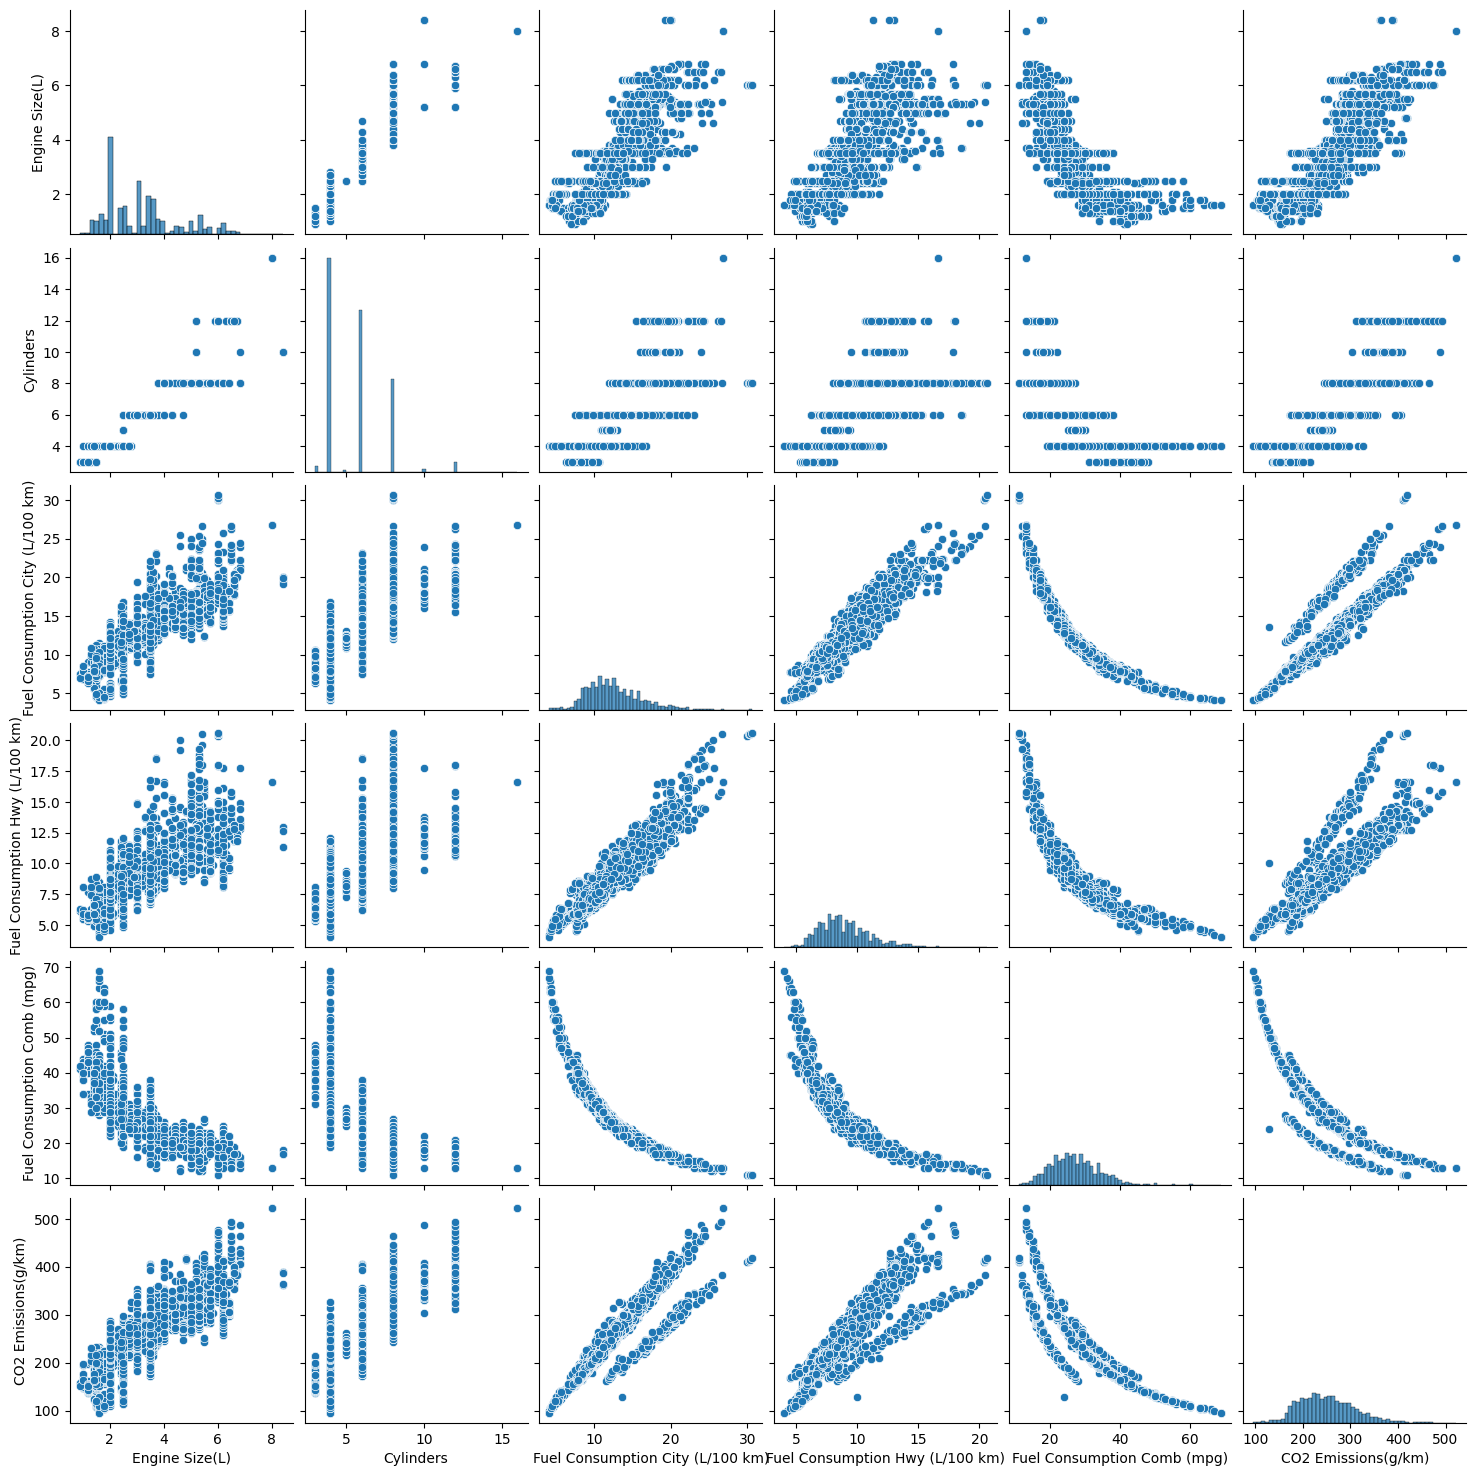

In [20]:
sns.pairplot(df[['Engine Size(L)','Cylinders','Fuel Consumption City (L/100 km)',
                 'Fuel Consumption Hwy (L/100 km)',
                 'Fuel Consumption Comb (mpg)','CO2 Emissions(g/km)']])

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='CO2 Emissions(g/km)'>

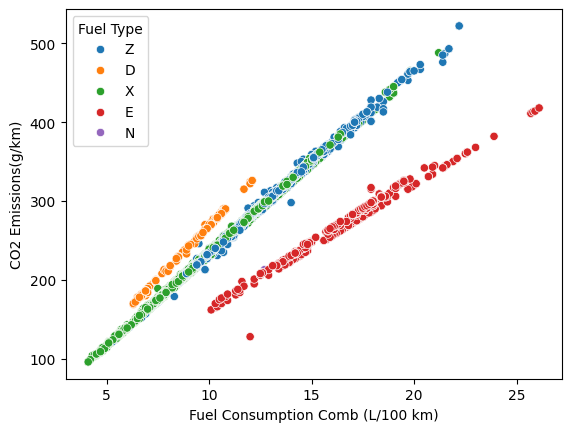

In [21]:
plt.Figure(figsize=(4,2))
sns.scatterplot(x='Fuel Consumption Comb (L/100 km)',y='CO2 Emissions(g/km)',hue = 'Fuel Type', data = df)

In [111]:
x = df.drop('CO2 Emissions(g/km)',axis = 1)                                                     #axis y:0, x:1
y = df['CO2 Emissions(g/km)']


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=48)       #or train_size = 0.8 ; random_state = sampling? 

In [107]:
df_no_co2 = df.drop('CO2 Emissions(g/km)', axis=1) 
num_features = df_no_co2.select_dtypes(include=[np.number]).columns.tolist()    # for scaler     
cat_features = df.select_dtypes(include=[np.object_]).columns.tolist()        # for encode 

In [87]:
num_features

['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)']

In [108]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# (1)
num_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='median')),               #fill Nan with median
    ('scaler',StandardScaler())
])

# (2)
cat_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

# (1)+(2)
preprocessor = ColumnTransformer(
    transformers= [
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ]
)


In [109]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

In [90]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption City '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Hwy '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(mpg)']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput...
0     ACURA          ILX         COMPACT          AS5         Z
1     ACURA          ILX         COMPACT           M6         Z
2     ACURA   ILX HYBRID         COMPACT          AV7         Z
3     ACURA      MDX 4WD     SUV - SMALL          AS6         Z
4     ACURA      RDX AWD     SUV - SMALL          AS6         Z
...     ...          ...             ...          ...       ...
7380  VOLVO  XC40 T5 AWD     SUV - SMALL          AS8         Z
7381  VOLVO  XC60 T5 AWD     SUV - SMALL          AS8         Z
7382  VOLVO  XC60 T6 AWD     SUV - SMALL          AS8         Z
7383  VOLVO  XC90 T5 AWD  SUV - STANDARD          AS8         Z
7384  VOLVO  XC90 T6 AWD  SUV - STANDARD          AS8         Z

[7385 rows x 5 columns])])),
                ('regressor', LinearRegression())])

In [112]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [70]:
# missing_cols = set(X_train.columns) - set(X_test.columns)
# if missing_cols:
#     print(f"Missing columns in X_test: {missing_cols}")

In [113]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')

print(f'R2 = {r2:.2f}, MSE = {mse:.2f}, RMSE = +- {rmse:.2f} g/km')


Mean Squared Error: 27.73
R^2 Score: 0.99
Root Mean Squared Error: 5.27
R2 = 0.99, MSE = 27.73, RMSE = +- 5.27 g/km


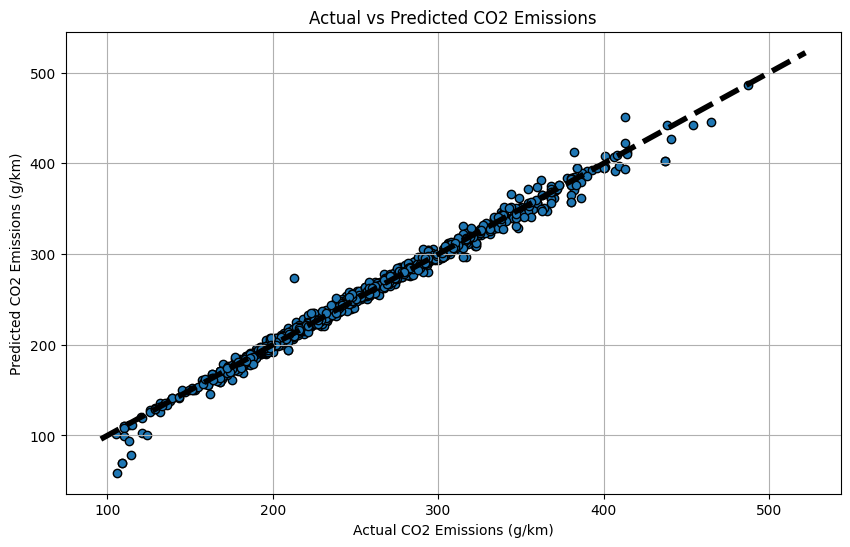

In [104]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Actual CO2 Emissions (g/km)')
plt.ylabel('Predicted CO2 Emissions (g/km)')
plt.title('Actual vs Predicted CO2 Emissions')
plt.grid()
plt.show()

In [114]:
w_1 = model.named_steps['regressor'].coef_[0]
w_2 = model.named_steps['regressor'].coef_[1]

# w_n = model.named_steps['regressor'].coef_[n-1]

b = model.named_steps['regressor'].intercept_

print(f' y = {w_1:.2f}x1 + {w_2:.2f}x2 + ... + {b:.2f}')

 y = 2.74x1 + 1.02x2 + ... + 242.55
